In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('dark_background')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [5]:
df = pd.get_dummies(df, columns=['country', 'source'])
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
 4   country_China        316200 non-null  uint8
 5   country_Germany      316200 non-null  uint8
 6   country_UK           316200 non-null  uint8
 7   country_US           316200 non-null  uint8
 8   source_Ads           316200 non-null  uint8
 9   source_Direct        316200 non-null  uint8
 10  source_Seo           316200 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


In [7]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print(input_columns)
print('\n')
print(output_column)

['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']


converted


In [8]:
x = df.loc[:,input_columns].values
y = df.loc[:,output_column].values
print(x.shape, y.shape)

(316200, 10) (316200,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100,stratify=y)

In [10]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(221340, 10)
(221340,)
(94860, 10)
(94860,)


In [11]:
# y_train.value_counts()
# y_test.value_counts()

In [12]:
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


In [13]:
logreg = LogisticRegression().fit(x_train, y_train)

C:\Users\pm_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [15]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9861254179090991
0.9863166772085178


In [16]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8415359477124184
0.8419281045751634


In [17]:
train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_TP = train_confusion[1, 1]
train_TN = train_confusion[0, 0]
train_FP = train_confusion[0, 1]
train_FN = train_confusion[1, 0]

In [18]:
test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_TP = test_confusion[1, 1]
test_TN = test_confusion[0, 0]
test_FP = test_confusion[0, 1]
test_FN = test_confusion[1, 0]

In [19]:
print(train_confusion)

[[213364    836]
 [  2235   4905]]


In [20]:
print(test_confusion)

[[91458   342]
 [  956  2104]]


In [21]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred)

In [22]:
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred)

No handles with labels found to put in legend.


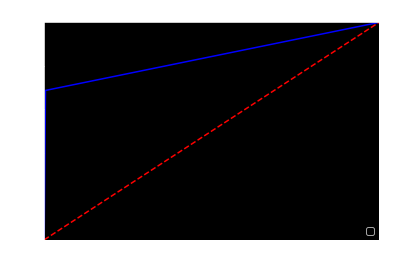

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

No handles with labels found to put in legend.


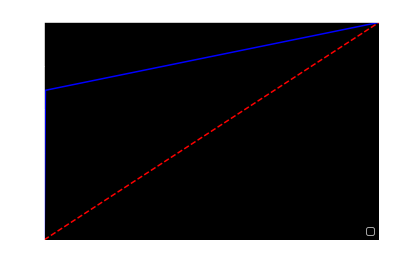

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(test_fpr, test_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()